In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

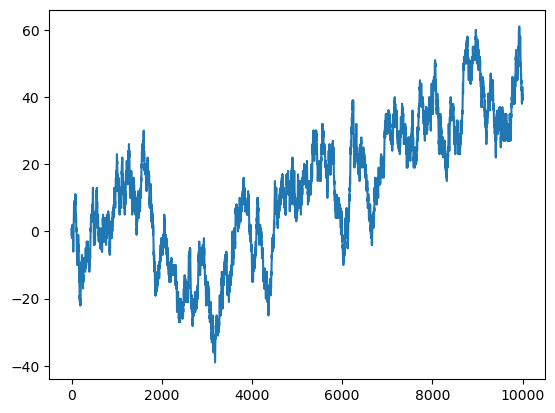

In [ ]:
#simple random walk
#In its simple sense it is both a Markov Chain and a Martingale
#If we include a random walk with drift then it is a Markov Chain but not a Martingale
N=10000
x = 0
rwalk = []
for i in range(N):
    x += random.choice([-1,1])
    rwalk.append(x)

plt.plot(rwalk)

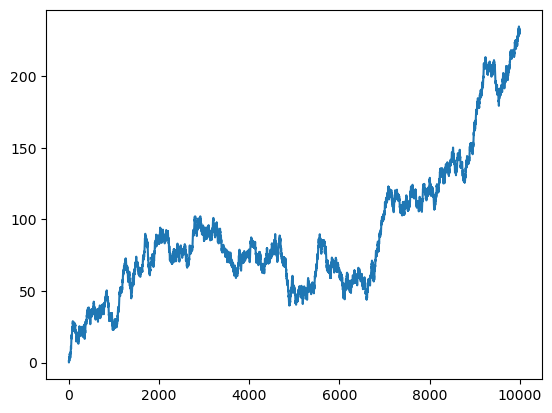

In [ ]:
#Random walk with drift
#Markov process with a drift but no longer a Martingale
N=10000
x = 0
rwalk = []
for i in range(N):
    x += random.choice([-1,1]) + 0.01
    rwalk.append(x)

plt.plot(rwalk)

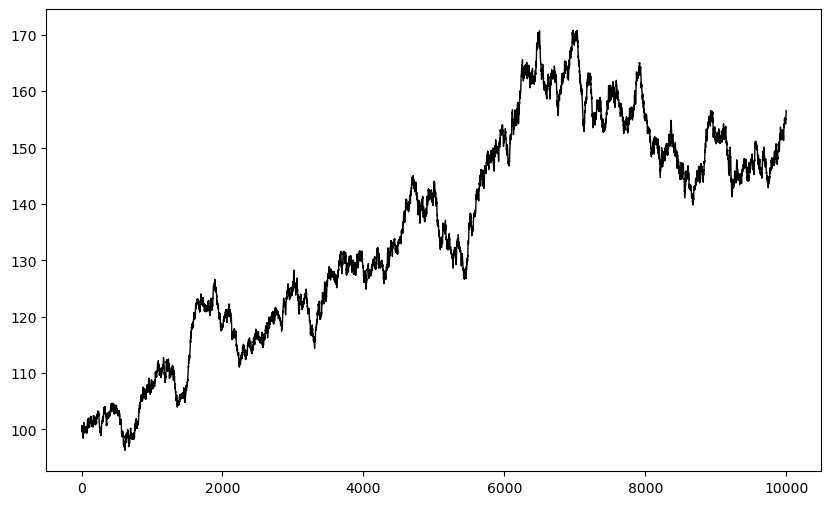

In [12]:
#Geometric Brownian Motion - Stock Price Model
#Not a martingale under the real world measure but is a martingale under the risk neutral measure

N=10000
mu = 0.1
sigma = 0.3
T = 1.0
dt = T/N
S = 100
gbm = np.zeros(N)
t = np.linspace(0,T,N)
gbm[0] = S

for i in range(1,N):
    gbm[i] = gbm[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal())

plt.figure(figsize=(10,6))
plt.plot(gbm, label='Geometric Brownian Motion', linewidth=1, color='black')

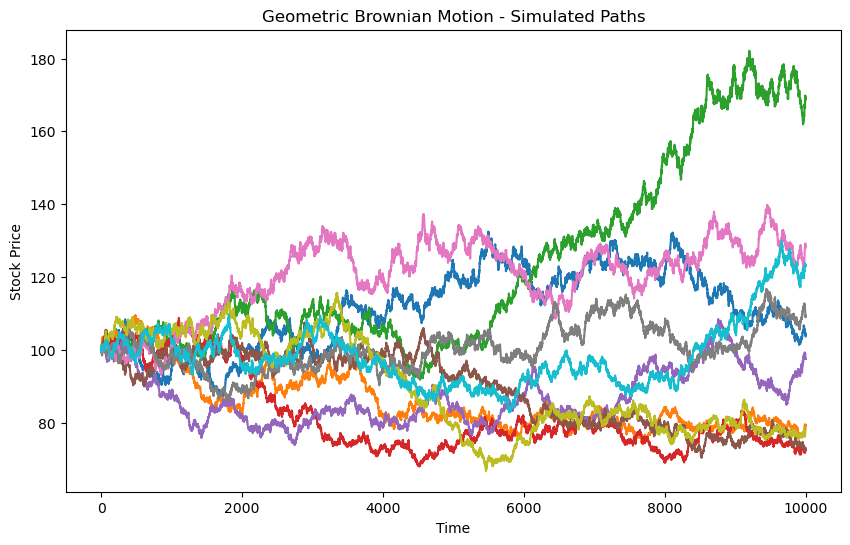

In [ ]:
#Simulating a few paths with Geometric Brownian Motion

N=10000
mu = 0.1
sigma = 0.3
T = 1.0
dt = T/N
S0 = 100
npaths = 10
t = np.linspace(0,T,N)

def simulate_gbm_path():
    S = np.zeros(N)
    S[0] = S0
    for i in range(1,N):
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal())
    return S

#Simulate npaths

paths = np.zeros((npaths,N))
for i in range(npaths):
    paths[i] = simulate_gbm_path()

plt.figure(figsize=(10,6))
for i in range(npaths):
    plt.plot(paths[i])
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Geometric Brownian Motion - Simulated 10 Paths')
plt.show()

Under EMH, Asset Prices follow Markov Processes

In continuous time we look at paths like how we look at points in discrete time. 
The underlying probability space is the space of all non-negative ocntinuous functions in R mapping onto R.

In such a space, Brownian Motion is defined as the probability distribution given by:
1) Stationarity - Meaning that for 2 points in time 0 < s < t we have that the difference follows N(0, t-s)
2) Independant Increment - Meaning that the distributions in each to non overlapping intervals are independant

Brownian Motion is the limit of simple random walks. It is the distribution that results from increasing the parameter N to infinity.

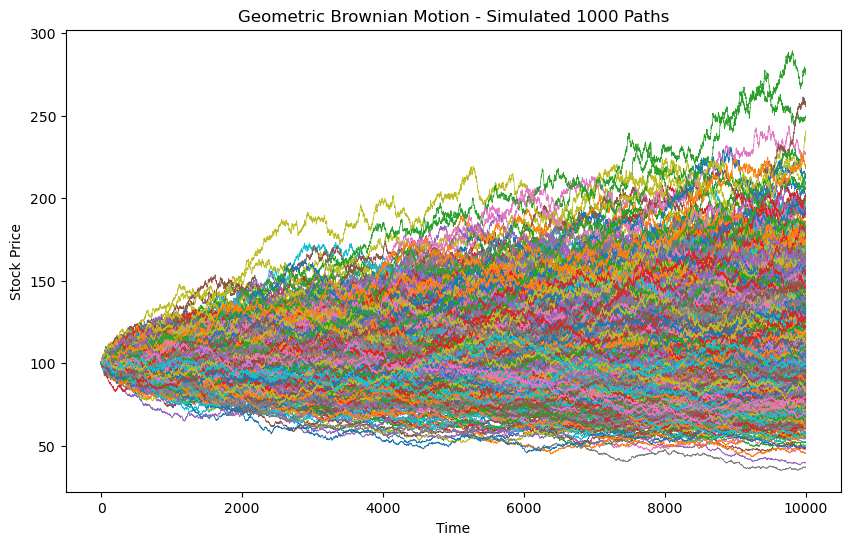

In [25]:
# Simulating many paths

npaths1 = 1000

paths1 = np.zeros((npaths1,N))
for i in range(npaths1):
    paths1[i] = simulate_gbm_path()

plt.figure(figsize=(10,6))
for i in range(npaths1):
    plt.plot(paths1[i], linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Geometric Brownian Motion - Simulated 1000 Paths')
plt.show()

Here, despite using the GBM, we see a propery of Brownian Motion where it tends not to deviate too much from the boundaries given by y^2.

Next, lets see it more directly with a random walk.

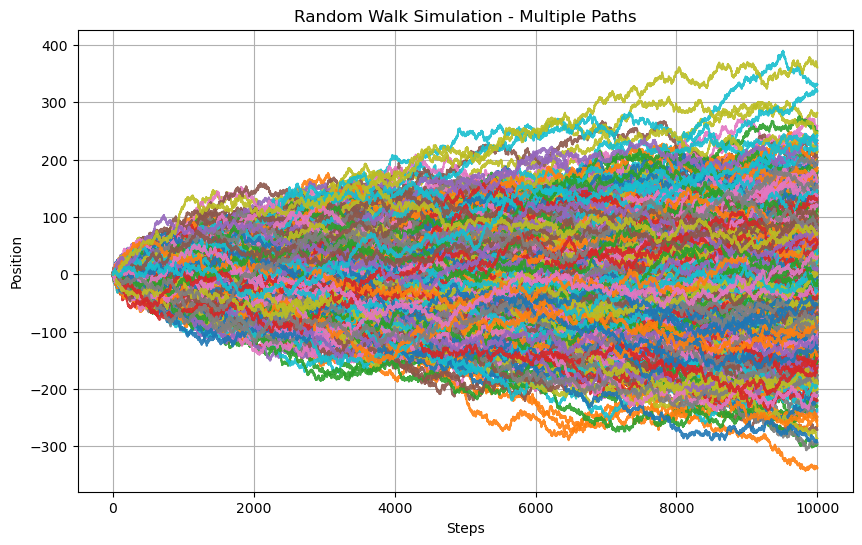

In [ ]:
num_paths = 1000  

def simulate_random_walk():
    x = np.zeros(N)
    for i in range(1, N):
        x[i] = x[i-1] + np.random.normal(0, 1)
    return x

paths = np.zeros((num_paths, N))
for i in range(num_paths):
    paths[i] = simulate_random_walk()

plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(paths[i], alpha=0.9)  
plt.xlabel('Steps')
plt.ylabel('Position')
plt.title('Random Walk Simulation - 1000 Paths')
plt.grid(True)
plt.show()

Here the property becomes more evident as largely, all of the random waks fall into the boundary between sqrt(t) and -sqrt(t)